## Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Load Dataset

In [2]:
df_crop = pd.read_csv("D:\\SEM 4\\z other\\Data analysis project\\crop production data district wise.csv")

In [3]:
df_crop

,State_and_Uts,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [4]:
df_crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_and_Uts  246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [5]:
df_crop.head()

,State_and_Uts,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [6]:
df_crop.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [7]:
df_crop.isnull().sum() #missing values 

State_and_Uts       0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [8]:
df_crop.duplicated().sum() #duplicate rows

0

In [9]:
df_crop.shape

(246091, 7)

In [10]:
#Dropping the samples having missing data
df_crop.dropna(subset=["Production"],axis=0,inplace=True)
df_crop

,State_and_Uts,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


### Exploratory Analysis and Visualization

In [11]:
states = df_crop.State_and_Uts.unique()
print(states)

['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh ' 'Jammu & Kashmir'
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttrakhand' 'West Bengal']


In [12]:
len(states)

33

In [13]:
df_crop.State_and_Uts.value_counts()

State_and_Uts
Uttar Pradesh                  33189
Madhya Pradesh                 22604
Karnataka                      21079
Bihar                          18874
Assam                          14622
Odisha                         13524
Tamil Nadu                     13266
Maharashtra                    12496
Rajasthan                      12066
Chhattisgarh                   10368
West Bengal                     9597
Andhra Pradesh                  9561
Gujarat                         8365
Telangana                       5591
Uttrakhand                      4825
Haryana                         4540
Kerala                          4003
Nagaland                        3904
Punjab                          3143
Meghalaya                       2867
Arunachal Pradesh               2545
Himachal Pradesh                2456
Jammu & Kashmir                 1632
Tripura                         1412
Manipur                         1266
Jharkhand                       1266
Mizoram                 

- We have data from 33 states (including union territories).
- We have more data from top agriculture rich states like Uttar Pradesh, Madhya Pradesh and Karnataka than other states.

In [14]:
print(df_crop.Crop_Year.nunique())
print(df_crop.Crop_Year.min())
print(df_crop.Crop_Year.max())

19
1997
2015


In [15]:
print(df_crop.Crop_Year.value_counts())

Crop_Year
2003    17139
2002    16536
2007    14269
2008    14230
2006    13976
2004    13858
2010    13793
2011    13791
2009    13767
2000    13553
2005    13519
2013    13475
2001    13293
2012    13184
1999    12441
1998    11262
2014    10815
1997     8899
2015      561
Name: count, dtype: int64


- We have data of 19 years from 1997 to 2015.
- The years having more data are - 2003, 2002, 2007, 2008 and 2006

In [16]:
print(df_crop.Season.nunique())

6


In [17]:
seasons = df_crop.Season.unique()
print(seasons)

['Kharif     ' 'Whole Year ' 'Autumn     ' 'Rabi       ' 'Summer     '
 'Winter     ']


In [18]:
print(df_crop.Season.max())

Winter     


In [19]:
print(df_crop.Season.value_counts())

Season
Kharif         94283
Rabi           66160
Whole Year     56127
Summer         14811
Winter          6050
Autumn          4930
Name: count, dtype: int64


- Dataset have 6 different seasons - Kharif, Annual, Autumn, Rabi, Summer and Winter.
- More crops yielding in Winter.
- Frequency wise, we have more data points from Kharif, Rabi and Annual crop types.

In [20]:
print(df_crop.Crop.nunique())

124


In [21]:
crops = df_crop.Crop.unique()
print(crops)

['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut '
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Urad' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Masoor' 'Sesamum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Soyabean' 'Beans & Mutter(Vegetable)' 'Bhindi'
 'Brinjal' 'Citrus Fruit' 'Cucumber' 'Grapes' 'Mango' 'Orange'
 'other fibres' 'Other Fresh Fruits' 'Other Vegetables' 'Papaya'
 'Pome Fruit' 'Tomato' 'Mesta' 'Cowpea(Lobia)' 'Lemon' 'Pome Granet'
 'Sapota' 'Cabbage' 'Rapeseed &Mustard' 'Peas  (vegetable)' 'Niger seed'
 'Bottle Gourd' 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total' 'Pulses total'
 'Jute' 'Peas & beans (Pulses)' 'Blackgram' 'Paddy' 'Pineapple' 'Barley'
 'Sannhamp' 'Khesari' 'Guar seed' 'Moth' 

In [22]:
print(df_crop.Crop.value_counts().head(25))

Crop
Rice                     15082
Maize                    13787
Moong(Green Gram)        10106
Urad                      9710
Sesamum                   8821
Groundnut                 8770
Wheat                     7878
Sugarcane                 7827
Rapeseed &Mustard         7533
Arhar/Tur                 7476
Gram                      7227
Jowar                     6990
Onion                     6984
Potato                    6914
Dry chillies              6421
Sunflower                 5483
Bajra                     5379
Small millets             4593
Peas & beans (Pulses)     4447
Cotton(lint)              4382
Linseed                   4351
Turmeric                  4168
Masoor                    4152
Sweet potato              4122
Barley                    4116
Name: count, dtype: int64


In [23]:
print(df_crop.Area.max())
print(df_crop.Area.min())

8580100.0
0.1


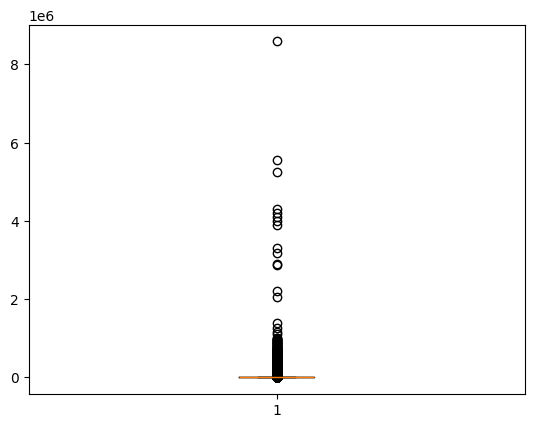

In [24]:
plt.boxplot(df_crop.Area);

- Most values are very close to zero, showing that a large number of records have small cultivation areas.
- Some entries have very large land areas.
- This high number of outliers suggests skewed data — maybe a few districts have much larger land under cultivation.

In [25]:
df_crop.Production.describe()

count    2.423610e+05
mean     5.825034e+05
std      1.706581e+07
min      0.000000e+00
25%      8.800000e+01
50%      7.290000e+02
75%      7.023000e+03
max      1.250800e+09
Name: Production, dtype: float64

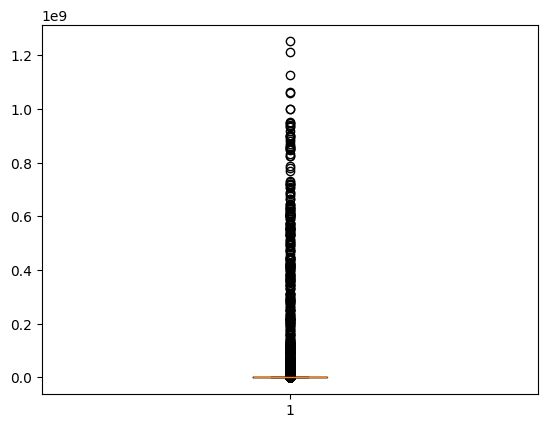

In [26]:
plt.boxplot(df_crop.Production);

- many values are low, but some have extremely high production.
- More outliers than Area — showing production varies more dramatically across districts/crops.

In [27]:
# Define crop categories as a dictionary
crop_categories = {
    'Cereal': ['Rice', 'Maize', 'Wheat', 'Barley', 'Varagu', 'Other Cereals & Millets', 'Ragi', 'Small millets',
               'Bajra', 'Jowar', 'Paddy', 'Total foodgrain', 'Jobster'],
    
    'Pulses': ['Moong', 'Urad', 'Arhar/Tur', 'Peas & beans', 'Masoor', 'Other Kharif pulses', 'other misc. pulses',
               'Ricebean (nagadal)', 'Rajmash Kholar', 'Lentil', 'Samai', 'Blackgram', 'Korra', 'Cowpea(Lobia)',
               'Other  Rabi pulses', 'Other Kharif pulses', 'Peas & beans (Pulses)', 'Pulses total', 'Gram'],
    
    'Fruits': ['Peach', 'Apple', 'Litchi', 'Pear', 'Plums', 'Ber', 'Sapota', 'Lemon', 'Pome Granet', 'Other Citrus Fruit',
               'Water Melon', 'Jack Fruit', 'Grapes', 'Pineapple', 'Orange', 'Pome Fruit', 'Citrus Fruit', 
               'Other Fresh Fruits', 'Mango', 'Papaya', 'Coconut', 'Banana'],
    
    'Beans': ['Bean', 'Lab-Lab', 'Moth', 'Guar seed', 'Soyabean', 'Horse-gram'],
    
    'Vegetables': ['Turnip', 'Peas', 'Beet Root', 'Carrot', 'Yam', 'Ribed Guard', 'Ash Gourd', 'Pump Kin', 'Redish', 
                   'Snak Guard', 'Bottle Gourd', 'Bitter Gourd', 'Cucumber', 'Drum Stick', 'Cauliflower', 
                   'Beans & Mutter(Vegetable)', 'Cabbage', 'Bhindi', 'Tomato', 'Brinjal', 'Khesari', 'Sweet potato', 
                   'Potato', 'Onion', 'Tapioca', 'Colocosia'],
    
    'Spices': ['Perilla', 'Ginger', 'Cardamom', 'Black pepper', 'Dry ginger', 'Garlic', 'Coriander', 'Turmeric', 
               'Dry chillies', 'Cond-spcs other'],
    
    'Fibres': ['other fibres', 'Kapas', 'Jute & mesta', 'Jute', 'Mesta', 'Cotton(lint)', 'Sannhamp'],
    
    'Nuts': ['Arcanut (Processed)', 'Atcanut (Raw)', 'Cashewnut Processed', 'Cashewnut Raw', 'Cashewnut', 
             'Arecanut', 'Groundnut'],
    
    'Oilseeds': ['other oilseeds', 'Safflower', 'Niger seed', 'Castor seed', 'Linseed', 'Sunflower', 
                 'Rapeseed &Mustard', 'Sesamum', 'Oilseeds total'],
    
    'Commercial': ['Tobacco', 'Coffee', 'Tea', 'Sugarcane', 'Rubber']
}

def crop_category(crop):
    for category, crops in crop_categories.items():
        if crop in crops:
            return category
    return 'Unknown'  
df_crop['crop_category'] = df_crop['Crop'].apply(crop_category)


### **What is happening in this code?**  
This code is categorizing crops into different types.  

1) **I made a dictionary (`crop_categories`)**  
   - Different categories (e.g., 'Cereal', 'Pulses', 'Fruits').  

2) **Created a Function (`crop_category()`)**  
   - It loops through the dictionary and checks if the given crop is present in any category.  
   - If a match is found, it returns its category.  
   - If no match is found, it returns `'Unknown'`.  

---

### **Reason**  

1) **To Group Similar Crops Together**  
   - Makes analysis easier by categorizing crops into broader groups like **Cereals, Pulses, Vegetables, Fruits, etc.**  
   - Helps in **better visualization**.  

2) **To Improve Data Insights**  
   - Instead of analyzing individual crops, we can analyze **entire categories**.  
   - Helps in understanding **which crop type contributes the most** in agriculture production.  


In [28]:
df_crop["crop_category"].value_counts()

crop_category
Cereal        63283
Pulses        40898
Oilseeds      33801
Vegetables    23198
Spices        21638
Unknown       12457
Nuts          11472
Commercial    10561
Fibres         9785
Beans          9115
Fruits         6153
Name: count, dtype: int64

- A new variable 'crop_category' is created.
- Cereals, Pulses and Oilseeds are top producing categories.

In [29]:
# NEW VARIABLE - PRODUCTION PER UNIT AREA
df_crop['production_per_unit_area'] = df_crop['Production'] / df_crop['Area']

In [30]:
df_crop['production_per_unit_area']

0          1.594896
1          0.500000
2          3.147059
3          3.642045
4          0.229167
            ...    
246086     2.617647
246087     0.738437
246088    50.154321
246089     2.141848
246090     0.502857
Name: production_per_unit_area, Length: 242361, dtype: float64

- A new new variable 'production_per_unit_area' for Production per unit area is created.

# Visualising Data

### 1. State Wise Data

In [31]:
production = df_crop.groupby(by='State_and_Uts')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)
production

,State_and_Uts,Production
15,Kerala,9.788005e+10
1,Andhra Pradesh,1.732459e+10
27,Tamil Nadu,1.207644e+10
30,Uttar Pradesh,3.234493e+09
3,Assam,2.111752e+09
32,West Bengal,1.397904e+09
17,Maharashtra,1.263641e+09
14,Karnataka,8.634298e+08
0,Andaman and Nicobar Islands,7.182232e+08
24,Punjab,5.863850e+08


### 2. State wise Production

<BarContainer object of 10 artists>

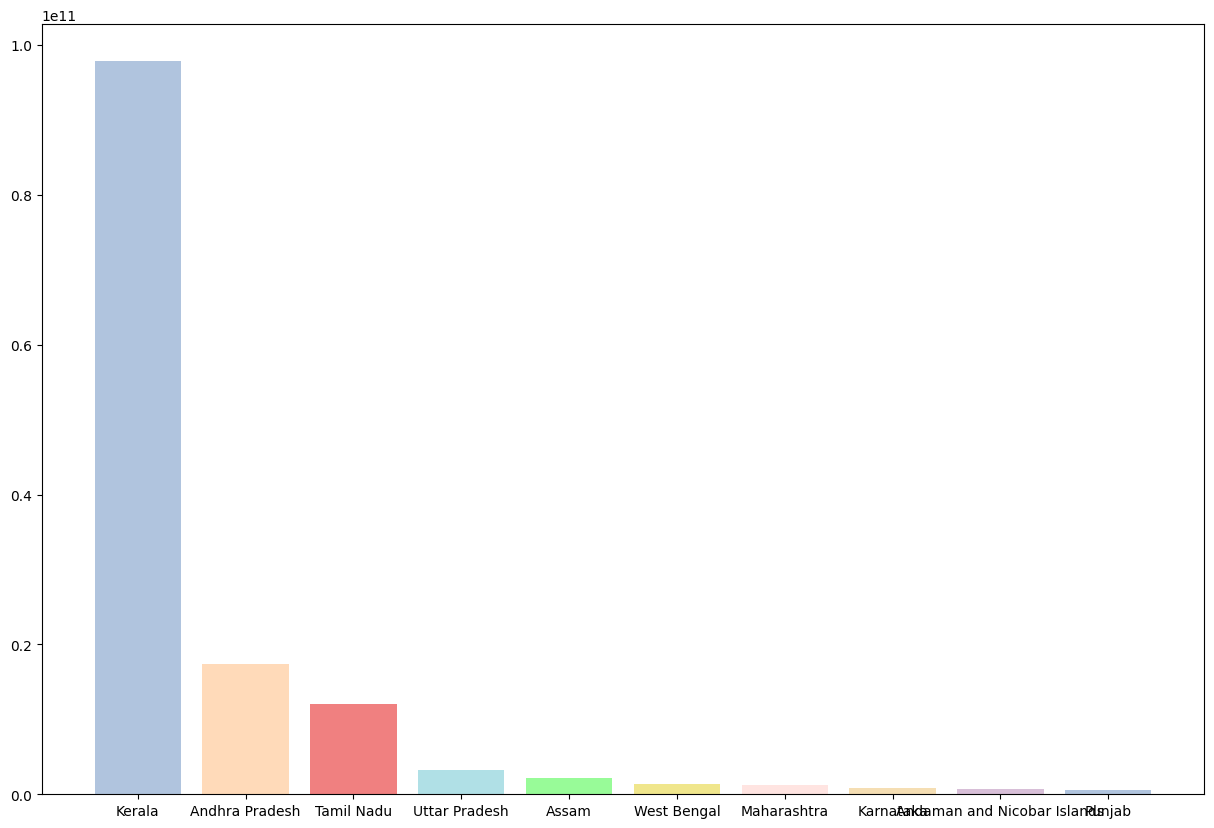

In [32]:
plt.figure(figsize= (15,10))
x=production['Production'].head(10)
y= production["State_and_Uts"].head(10)
pestel1 = ["lightsteelblue", "peachpuff", "lightcoral", "powderblue", "palegreen", "khaki", "mistyrose", "wheat", "thistle" ]
plt.bar(y,x,color = pestel1)

- Each bar is representing a state.
- The length of the bar shows the total crop production.
- The highest production state wise is Kerala.

In [33]:
df_crop.Production.describe()

count    2.423610e+05
mean     5.825034e+05
std      1.706581e+07
min      0.000000e+00
25%      8.800000e+01
50%      7.290000e+02
75%      7.023000e+03
max      1.250800e+09
Name: Production, dtype: float64

### 3. Year wise Production

In [34]:
year_wise_production = df_crop.groupby(by='Crop_Year')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)
year_wise_production

,Crop_Year,Production
14,2011,1.430890e+10
16,2013,1.290359e+10
9,2006,8.681913e+09
17,2014,8.664541e+09
7,2004,8.189462e+09
15,2012,8.171055e+09
8,2005,8.043757e+09
6,2003,7.917974e+09
11,2008,7.717018e+09
5,2002,7.696955e+09


Text(0.5, 1.0, 'Crops Year vs Production')

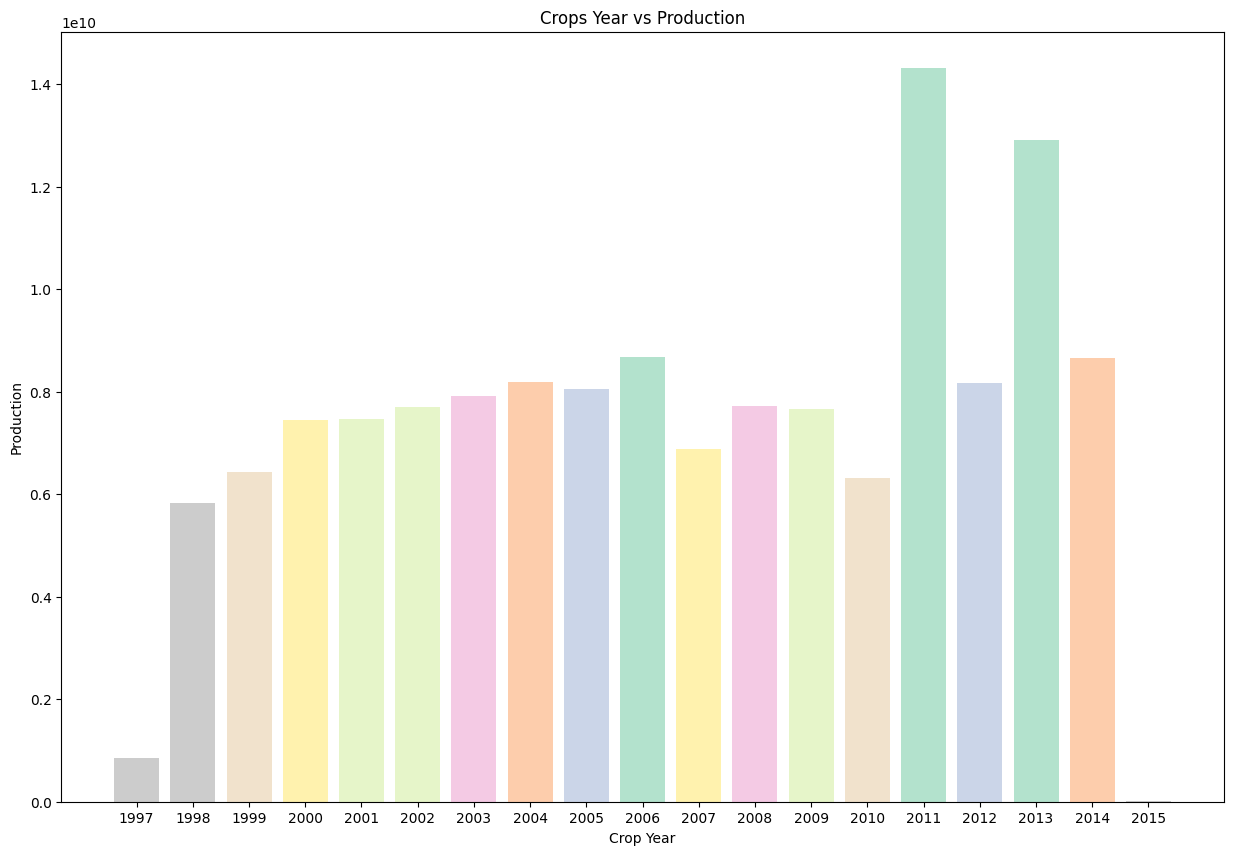

In [35]:
plt.figure(figsize=(15,10))
colors = plt.cm.Pastel2(np.linspace(0, 1, len(year_wise_production)))
plt.bar(year_wise_production.Crop_Year, year_wise_production.Production, color=colors)
plt.xticks(year_wise_production.Crop_Year)
plt.xlabel("Crop Year")
plt.ylabel("Production")
plt.title('Crops Year vs Production')

- Height of each bar represents the total crop production in that year
- 2011 saw the highest crop production.
- 2015 saws the lowest crop production may be due to missing or inconsistent data.
- 1997 One of the lowest full data years and low crop production year.

### 4. Season wise Production

In [36]:
season_wise_production = df_crop.groupby(by='Season')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
season_wise_production

,Season,Production
4,Whole Year,1.344248e+11
1,Kharif,4.029970e+09
2,Rabi,2.051688e+09
5,Winter,4.345498e+08
3,Summer,1.706579e+08
0,Autumn,6.441377e+07


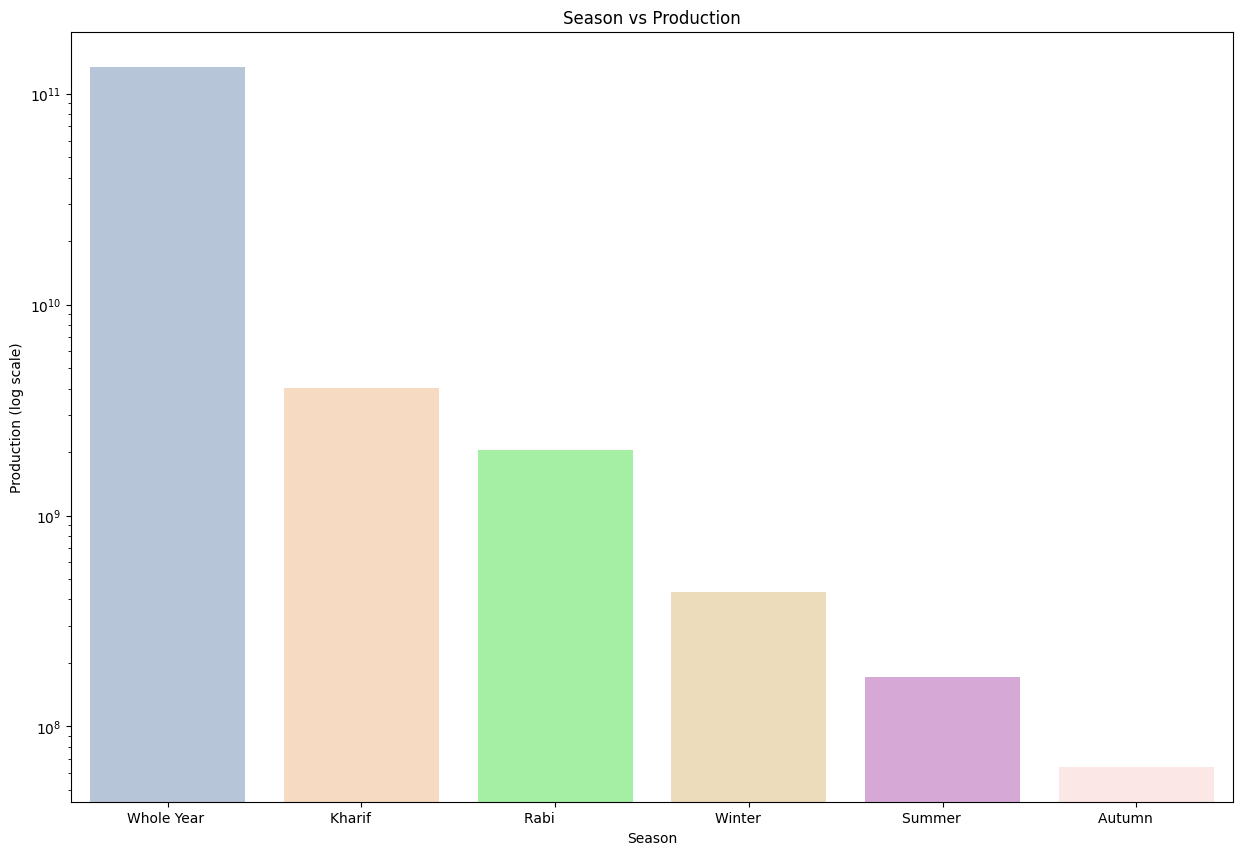

In [37]:
plt.figure(figsize=(15,10))
pastels= ["lightsteelblue", "peachpuff", "palegreen", "wheat", "plum", "mistyrose"]
sns.barplot(x='Season', y='Production', data=season_wise_production,palette=pastels)
plt.yscale('log')
plt.title('Season vs Production')
plt.xlabel('Season')
plt.ylabel('Production (log scale)')
plt.show()

- Top crop categories which shows high production values are Whole Year(Annual growing plants), Kharif and Rabi crops.
- These crop are generally dependent on monsoons.

### 5. Category wise production

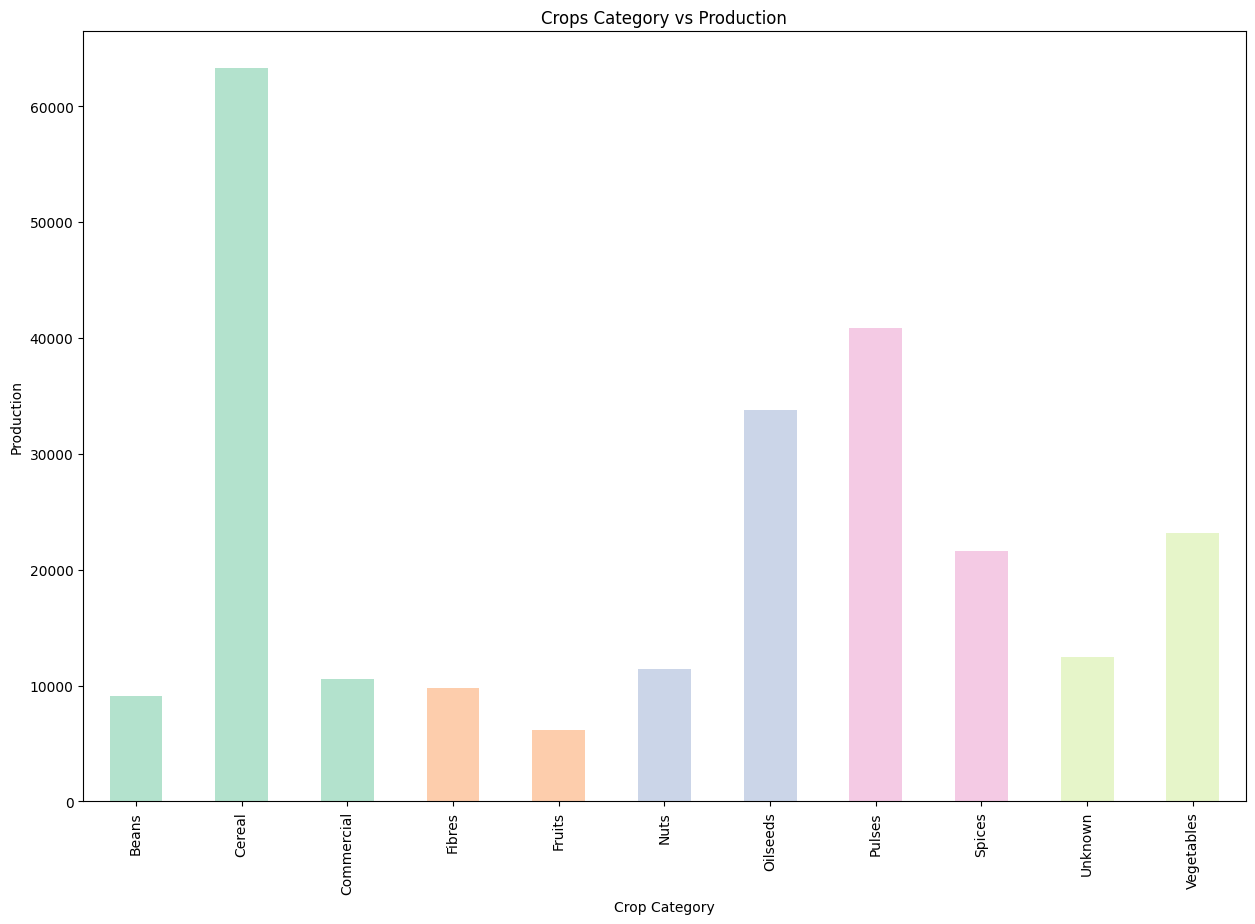

In [38]:
plt.figure(figsize=(15,10))
df_crop.groupby("crop_category")["Production"].agg("count").plot.bar(color=colors)
plt.xlabel("Crop Category")
plt.ylabel("Production")
plt.title('Crops Category vs Production')
plt.show()

- This graph is showing the the production of the crop category.
- In this graph the highest production crop category is Cereal followed by Pulses.

### 6. Different proportion of Crop Categories for India

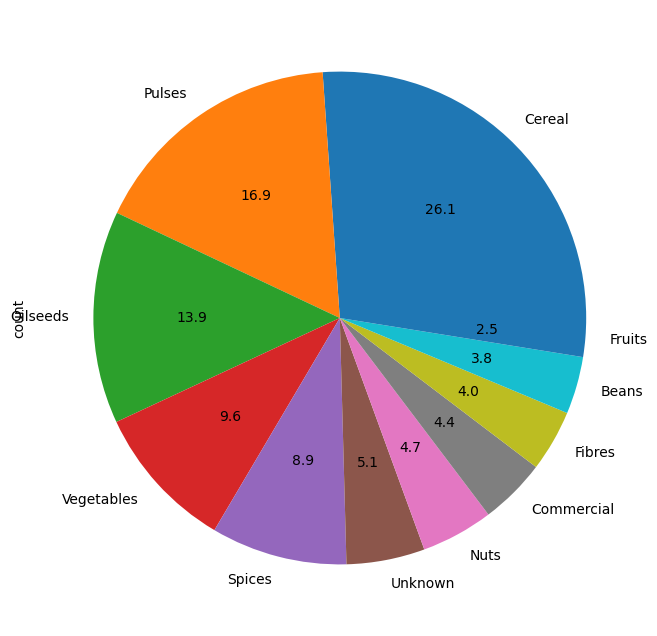

In [39]:
plt.figure(figsize=(8,8))
df1=df_crop["crop_category"].value_counts()
df1.plot(kind="pie",autopct="%1.1f")
plt.show()

- The top three (Cereals, Pulses, Oilseeds) make up 56.9% of total production — over half.
- **Top producing categories are:**
- Cereals - 26.1%
- Pulses - 16.9%
- Oilseeds - 13.9%


### State wise crop production with different categories of crops

In [40]:
state_wise = pd.crosstab(df_crop['State_and_Uts'], df_crop['crop_category'])
state_wise

crop_category,Beans,Cereal,Commercial,Fibres,Fruits,Nuts,Oilseeds,Pulses,Spices,Unknown,Vegetables
State_and_Uts,,,,,,,,,,,
Andaman and Nicobar Islands,0,20,15,0,16,37,11,9,52,21,20
Andhra Pradesh,386,2264,474,333,502,674,1101,1336,802,643,1046
Arunachal Pradesh,26,1021,168,0,0,26,343,67,637,0,257
Assam,0,2952,854,1284,920,400,2097,2234,1338,762,1781
Bihar,280,6108,756,924,226,130,2504,3731,1396,1044,1775
Chandigarh,0,39,0,0,0,0,7,14,0,3,26
Chhattisgarh,646,1805,316,535,264,261,1496,2087,1288,527,1143
Dadra and Nagar Haveli,0,116,12,13,9,9,30,64,1,9,0
Goa,0,62,22,0,16,47,0,32,12,16,0


In [41]:
df_crop.groupby("State_and_Uts")["crop_category"].count()

State_and_Uts
Andaman and Nicobar Islands      201
Andhra Pradesh                  9561
Arunachal Pradesh               2545
Assam                          14622
Bihar                          18874
Chandigarh                        89
Chhattisgarh                   10368
Dadra and Nagar Haveli           263
Goa                              207
Gujarat                         8365
Haryana                         4540
Himachal Pradesh                2456
Jammu & Kashmir                 1632
Jharkhand                       1266
Karnataka                      21079
Kerala                          4003
Madhya Pradesh                 22604
Maharashtra                    12496
Manipur                         1266
Meghalaya                       2867
Mizoram                          954
Nagaland                        3904
Odisha                         13524
Puducherry                       872
Punjab                          3143
Rajasthan                      12066
Sikkim                  

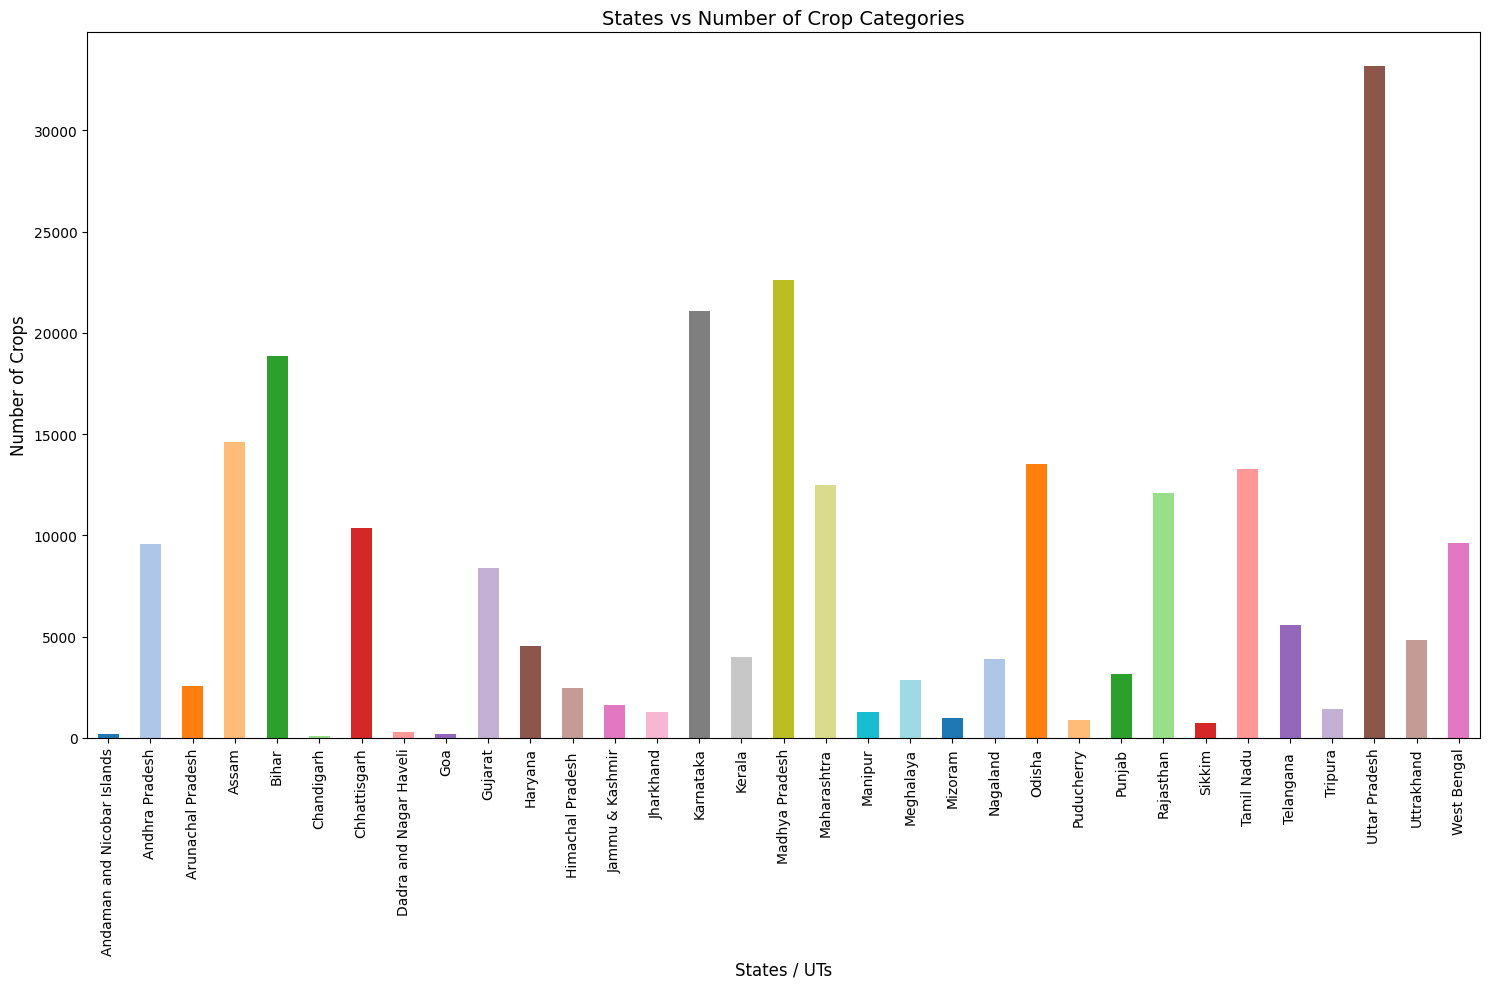

In [42]:
state_wise = pd.crosstab(df_crop['State_and_Uts'], df_crop['crop_category'])


plt.figure(figsize=(15, 10))

colors = plt.cm.tab20.colors  

df_crop.groupby("State_and_Uts")["crop_category"].count().plot.bar(color=colors)

plt.xlabel("States / UTs", fontsize=12)
plt.ylabel("Number of Crops", fontsize=12)
plt.title("States vs Number of Crop Categories", fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


- Uttar Pradesh leads by a large margin — indicating high crop diversity.
- **These states are likely to have:**
- Higher agricultural activity,
- Greater land under cultivation

# Electricity Consumption Dataset

In [43]:
df_electricity = pd.read_excel("D:\\SEM 4\\z other\\Data analysis project\\Electricity consumption in agriculture.xls")
df_electricity.head(5)

,Region,State_and_Uts,Consumption for Agriculture Purpose (GWh),Total Consumption (GWh),% Share of Consumption for Agricultural Purpose
0,NORTHERN,Haryana,7365.40,19291.41,38.18
1,NORTHERN,Himachal Pradesh,28.74,5460.51,0.53
2,NORTHERN,Jammu & Kashmir,271.42,4030.85,6.73
3,NORTHERN,Punjab,9325.42,29224.63,31.91
4,NORTHERN,Rajasthan,9790.86,26641.57,36.75


In [44]:
df_electricity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Region                                           35 non-null     object 
 1   State_and_Uts                                    35 non-null     object 
 2   Consumption for Agriculture Purpose (GWh)        35 non-null     float64
 3   Total Consumption     (GWh)                      35 non-null     float64
 4   % Share of Consumption for Agricultural Purpose  35 non-null     float64
dtypes: float64(3), object(2)
memory usage: 1.5+ KB


In [45]:
df_electricity.describe()

,Consumption for Agriculture Purpose (GWh),Total Consumption (GWh),% Share of Consumption for Agricultural Purpose
count,35.000000,35.000000,35.000000
mean,3079.316857,15073.256286,9.899143
std,4909.841279,19049.882282,12.744733
min,0.000000,23.500000,0.000000
25%,1.910000,1044.405000,0.245000
50%,73.480000,4984.060000,1.930000
75%,6538.930000,24159.810000,17.630000
max,16604.570000,72804.420000,38.180000


In [46]:
df_electricity.isnull().sum() #missing values 

Region                                             0
State_and_Uts                                      0
Consumption for Agriculture Purpose (GWh)          0
Total Consumption     (GWh)                        0
% Share of Consumption for Agricultural Purpose    0
dtype: int64

In [47]:
df_electricity.duplicated().sum() #duplicate rows

0

In [48]:
states_UT = df_electricity.State_and_Uts.unique()
print(states_UT)

['Haryana' 'Himachal Pradesh ' 'Jammu & Kashmir' 'Punjab' 'Rajasthan'
 'Uttar Pradesh' 'Uttrakhand' 'Chandigarh' 'Delhi' 'Gujarat'
 'Madhya Pradesh' 'Chhattisgarh' 'Maharashtra' 'Goa' 'Daman & Diu '
 'Dadra and Nagar Haveli' 'Andhra Pradesh' 'Karnataka' 'Kerala'
 'Tamil Nadu' 'Lakshadweep' 'Pondicherry' 'Bihar' 'Jharkhand' 'Odisha'
 'West Bengal' 'Andaman and Nicobar Islands' 'Sikkim' 'Assam' 'Manipur'
 'Meghalaya' 'Nagaland' 'Tripura' 'Arunachal Pradesh ' 'Mizoram']


In [49]:
len(states_UT)

35

### Boxplot for Outliers

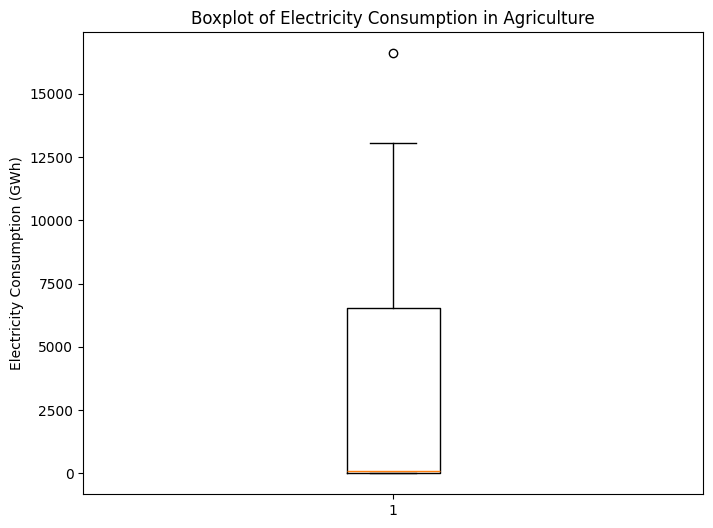

In [50]:
plt.figure(figsize=(8,6))
plt.boxplot(df_electricity['Consumption for Agriculture Purpose (GWh)'])
plt.title('Boxplot of Electricity Consumption in Agriculture')
plt.ylabel('Electricity Consumption (GWh)')
plt.show()

- The boxplot shows that most states have low to moderate electricity consumption for agriculture.
- A few states are outliers, consuming much higher electricity (above 15,000 GWh).
- The median electricity consumption is closer to the bottom, indicating that many states consume relatively less electricity compared to the highest ones.

### Total Electricity Consumption by State

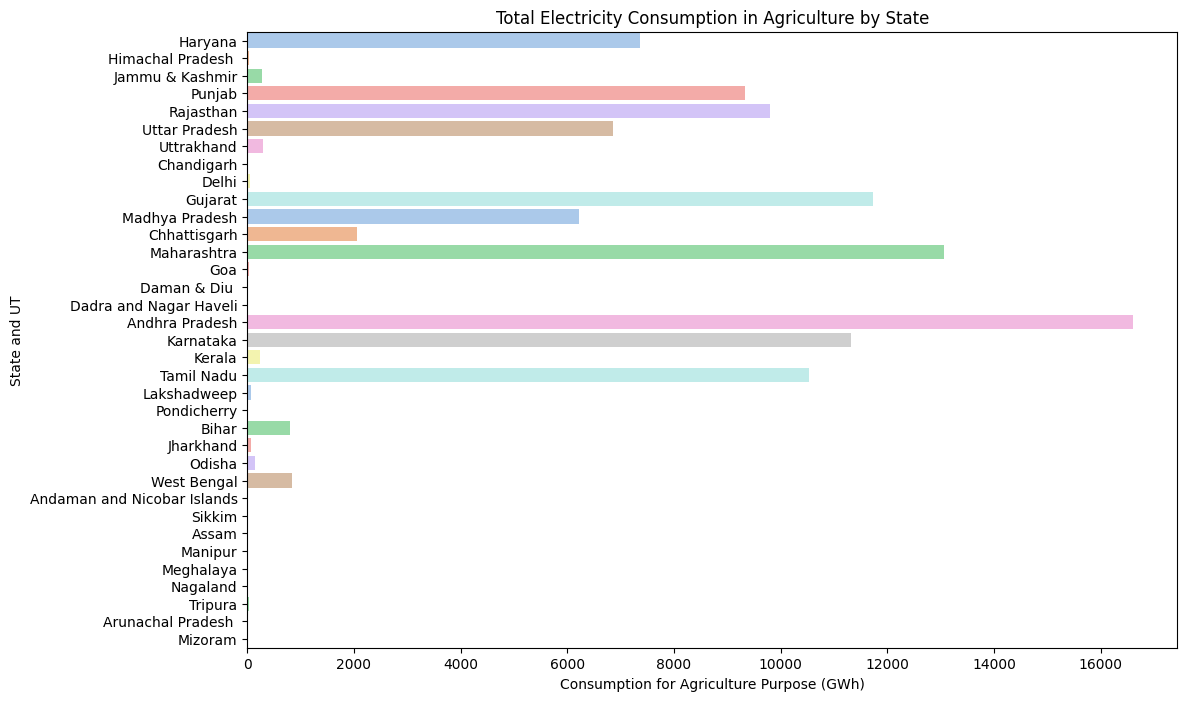

In [51]:
plt.figure(figsize=(12,8))
pastels = sns.color_palette("pastel")    
sns.barplot(x='Consumption for Agriculture Purpose (GWh)',y='State_and_Uts', data=df_electricity,palette=pastels)
plt.title('Total Electricity Consumption in Agriculture by State')
plt.xlabel('Consumption for Agriculture Purpose (GWh)')
plt.ylabel('State and UT')
plt.show()

- Andhra Pradesh has the highest electricity consumption for agriculture among all states.
- Many northeastern and smaller states (like Sikkim, Mizoram, Arunachal Pradesh) have very low electricity consumption in agriculture.

### Distribution of Electricity Consumption

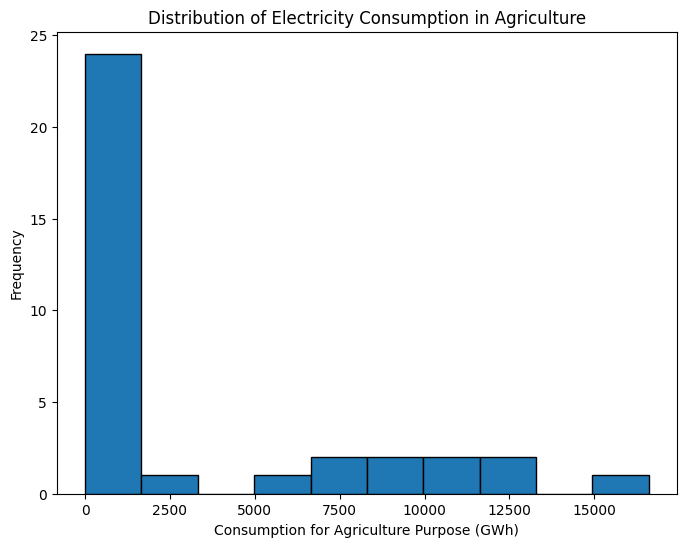

In [52]:
plt.figure(figsize=(8,6))
plt.hist(df_electricity['Consumption for Agriculture Purpose (GWh)'], edgecolor='black')
plt.title('Distribution of Electricity Consumption in Agriculture')
plt.xlabel('Consumption for Agriculture Purpose (GWh)')
plt.ylabel('Frequency')
plt.show()

- The distribution is highly right-skewed — most states have low electricity consumption for agriculture.
- Only a few states consume very high amounts of electricity (above 10,000 GWh)
- Majority of the states have consumption below 2500 GWh.

# Relation Between Crop Production and Electricity Consumption

In [53]:
# Merge on State names
combined_df = pd.merge(df_crop, df_electricity, on='State_and_Uts')

# See merged data
print(combined_df.head())

                 State_and_Uts District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production crop_category  \
0             Arecanut  1254.0      2000.0          Nuts   
1  Other Kharif pulses     2.0         1.0        Pulses   
2                 Rice   102.0       321.0        Cereal   
3               Banana   176.0       641.0        Fruits   
4            Cashewnut   720.0       165.0          Nuts   

   production_per_unit_area   Region   \
0                  1.594896  EASTERN    
1                  0.500000  EASTERN    
2                  3.147059  EASTERN    
3                  3.642045  EASTERN    
4

### Production vs Electricity Consumption

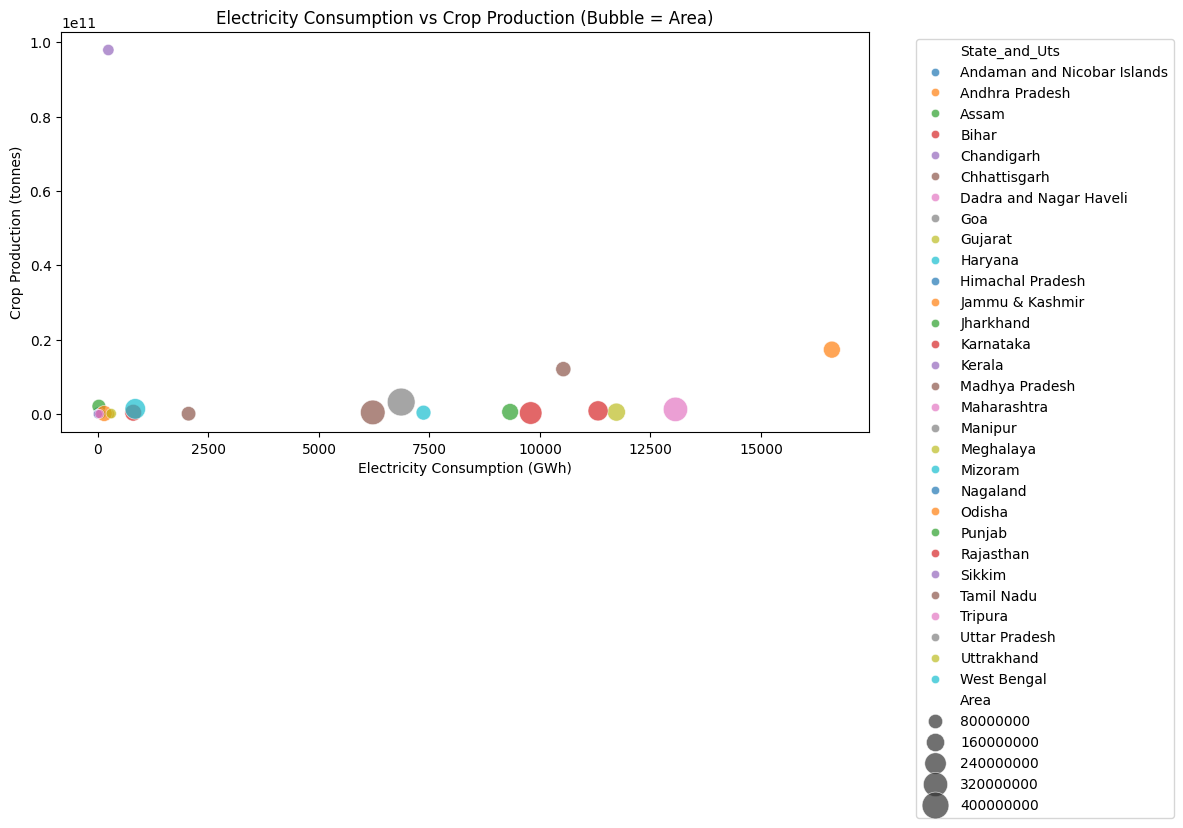

In [54]:
statewise_crop = df_crop.groupby("State_and_Uts").agg({
    "Production": "sum",
    "Area": "sum"
}).reset_index()

df_electricity.rename(columns={
    "State": "State_and_Uts",
    "Consumption for Agriculture Purpose (GWh)": "Electricity_Consumption"
}, inplace=True)

combined_df = pd.merge(statewise_crop, df_electricity, on="State_and_Uts", how="inner")

plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=combined_df,
    x="Electricity_Consumption",
    y="Production",
    hue="State_and_Uts",
    size="Area",
    sizes=(40, 400),
    alpha=0.7,
    palette="tab10"
)
plt.title("Electricity Consumption vs Crop Production (Bubble = Area)")
plt.xlabel("Electricity Consumption (GWh)")
plt.ylabel("Crop Production (tonnes)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- Uttar Pradesh or West Bengal shows an extremely high crop production, even though its electricity usage is moderate.
- Some states (like Andhra Pradesh, Maharashtra, Tamil Nadu) show high electricity consumption but moderate crop production.
- Larger bubbles near the top-left indicate large agricultural area with less electricity input.

In [55]:
print(combined_df[['Electricity_Consumption', 'Production']].corr())

                         Electricity_Consumption  Production
Electricity_Consumption                 1.000000    0.001531
Production                              0.001531    1.000000


### Regression Line Code

<Axes: xlabel='Electricity_Consumption', ylabel='Production'>

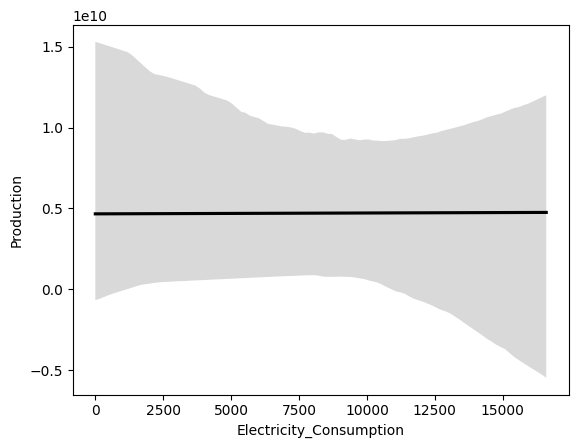

In [56]:
sns.regplot(data=combined_df, x="Electricity_Consumption", y="Production", scatter=False, color="black")

- The black line is almost horizontal, this confirms no significant linear relationship between electricity consumption and crop production.
- Wide Confidence Band, The grey shaded area is very wide, especially at the extremes. This means there is high uncertainty in predicting crop production based on electricity usage.
- Electricity consumption alone is not a strong predictor of crop production.